In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import knn
import q4

In [6]:
# Taken directly from q4.py
def knn_train_test(k, xTrain, yTrain, xTest, yTest, testType):
    """
    Given a specified k, train the knn model and predict
    the labels of the test data. Returns the accuracy of
    the resulting model.

    Parameters
    ----------
    k : int
        The number of neighbors
    xTrain : nd-array with shape n x d
        Training data 
    yTrain : 1d array with shape n
        Array of labels associated with training data.
    xTest : nd-array with shape m x d
        Test data 
    yTest : 1d array with shape m
        Array of labels associated with test data.

    Returns
    -------
    acc : float
        The accuracy of the trained knn model on the test data
    """
    model = knn.Knn(k)
    model.train(xTrain, yTrain['label'])
    # predict the train and test datasets
    # yHatTrain = model.predict(xTrain)
    yHatTest = model.predict(xTest)
    return (knn.accuracy(yHatTest, yTest['label']), k, testType)

In [7]:
xTrain = pd.read_csv("q4xTrain.csv")
yTrain = pd.read_csv("q4yTrain.csv")
xTest = pd.read_csv("q4xTest.csv")
yTest = pd.read_csv("q4yTest.csv")

In [8]:
datapoints = []
for k in range(1, 23, 2):
    # preprocess the data using standardization scaling
    acc1 = knn_train_test(k, xTrain, yTrain, xTest, yTest, "No Scaling")
    datapoints.append(acc1)

    xTrainStd, xTestStd = q4.standard_scale(xTrain, xTest)
    acc2 = knn_train_test(k, xTrainStd, yTrain, xTestStd, yTest, "Z Score Normal")
    datapoints.append(acc2)

    # preprocess the data using min max scaling
    xTrainMM, xTestMM = q4.minmax_range(xTrain, xTest)
    acc3 = knn_train_test(k, xTrainMM, yTrain, xTestMM, yTest, "Min Max")
    datapoints.append(acc3)

    # add irrelevant features
    xTrainIrr, yTrainIrr = q4.add_irr_feature(xTrain, xTest)
    acc4 = knn_train_test(k, xTrainIrr, yTrain, yTrainIrr, yTest, "Irrelevant Data")
    datapoints.append(acc4)

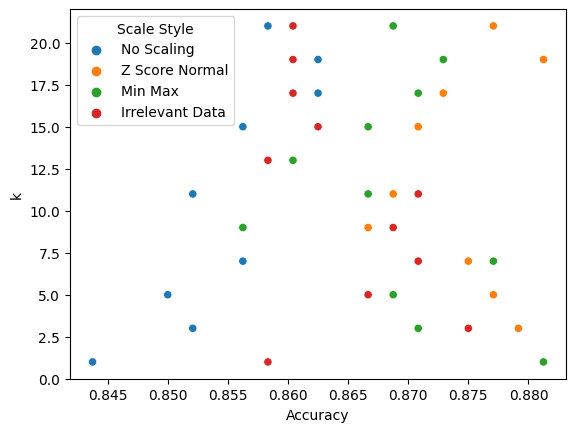

In [9]:
df = pd.DataFrame(datapoints, columns=["Accuracy", "k", "Scale Style"])
sns.scatterplot(data=df, x="Accuracy", y="k", hue="Scale Style", legend="full")
plt.show()